In [1]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

# データセットの読み込み
covertype = fetch_ucirepo(id=31)

X= covertype.data.features
y = covertype.data.targets

# データの前処理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


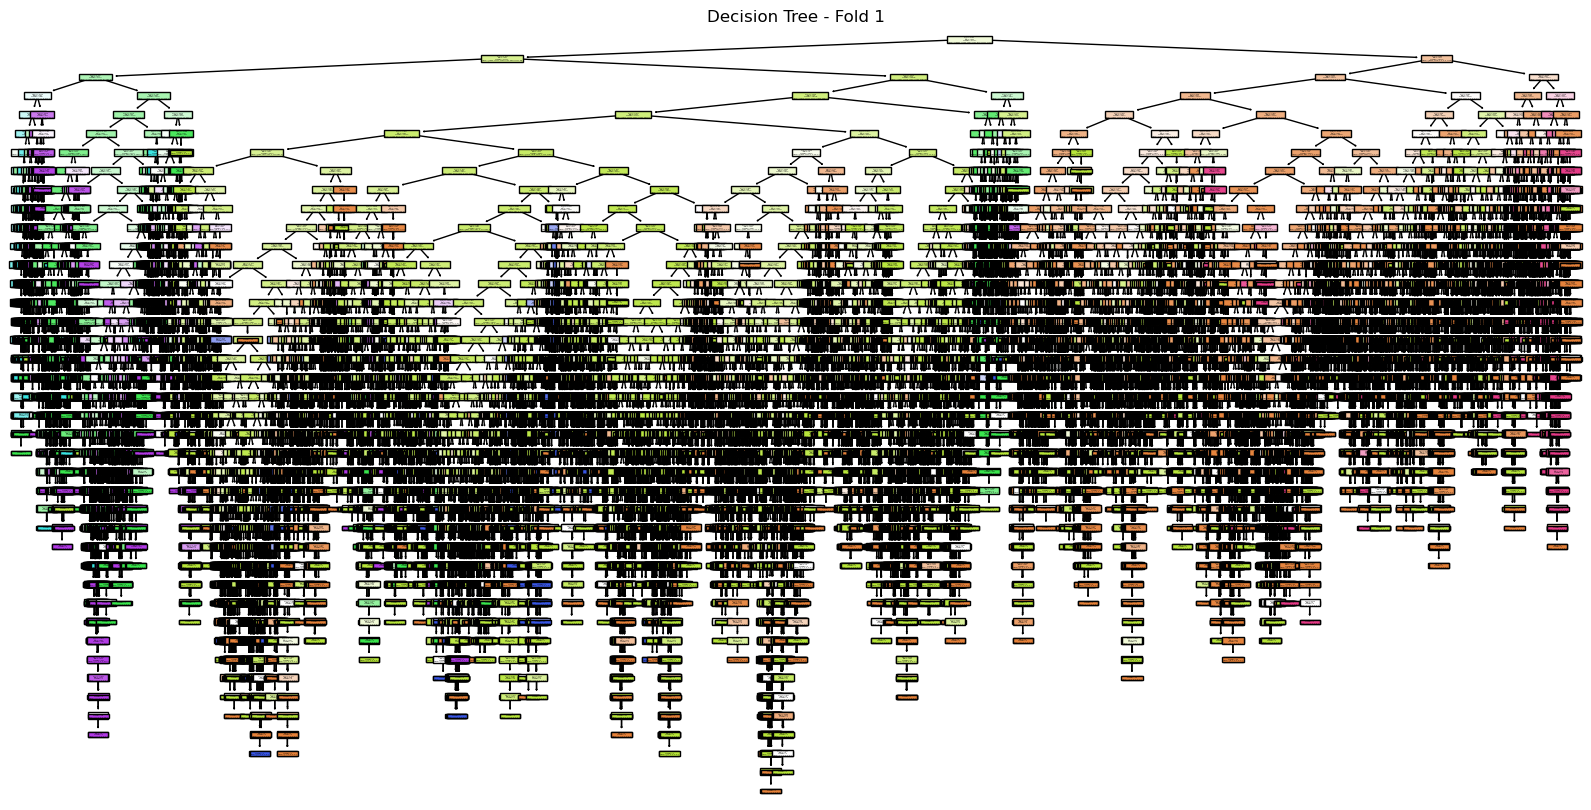

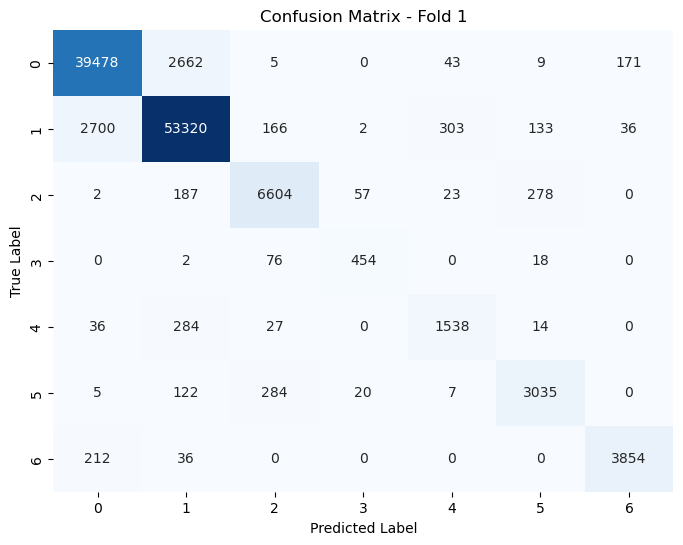

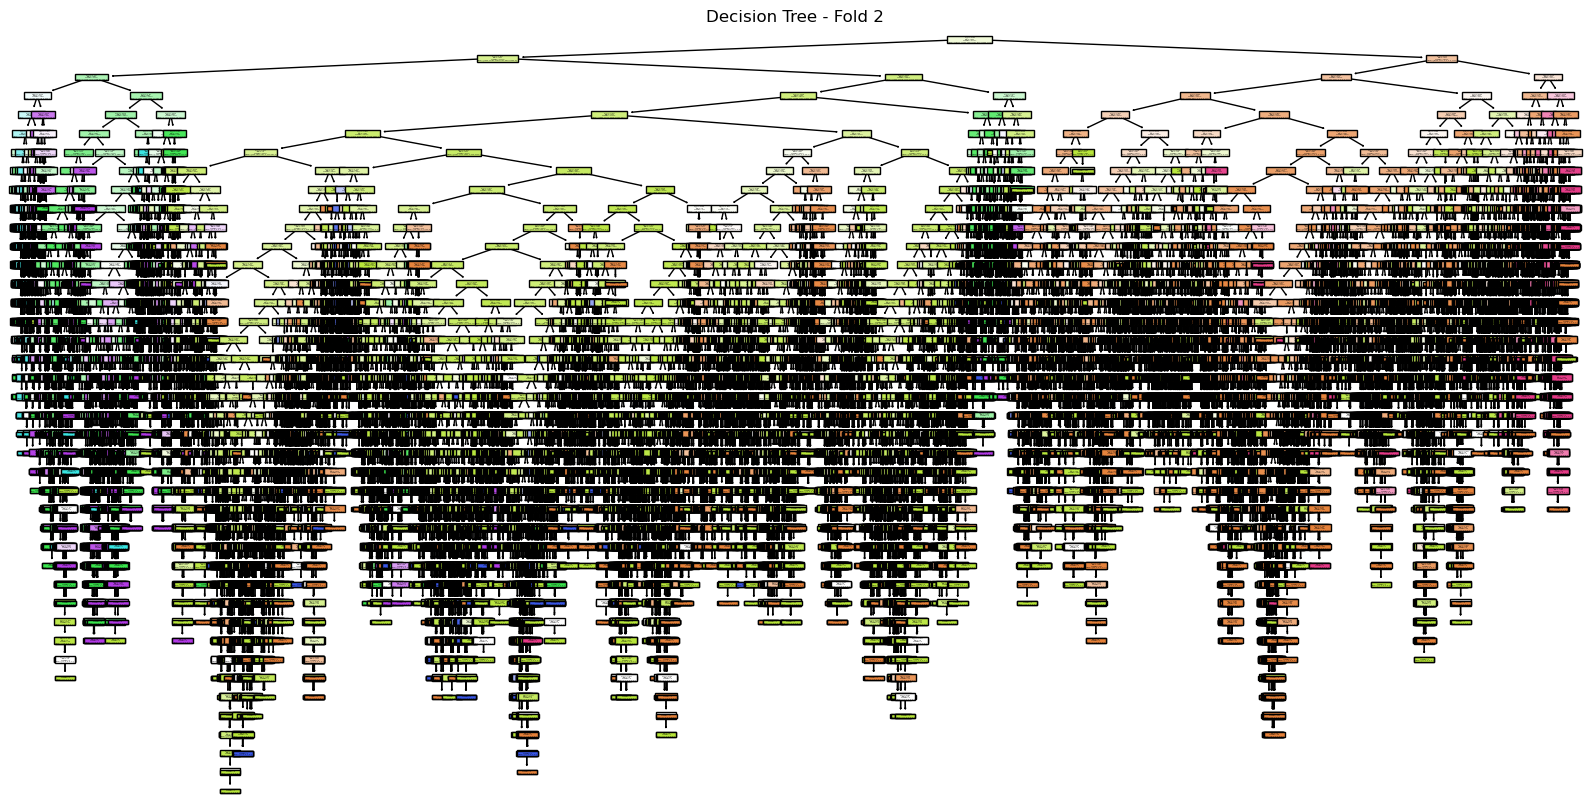

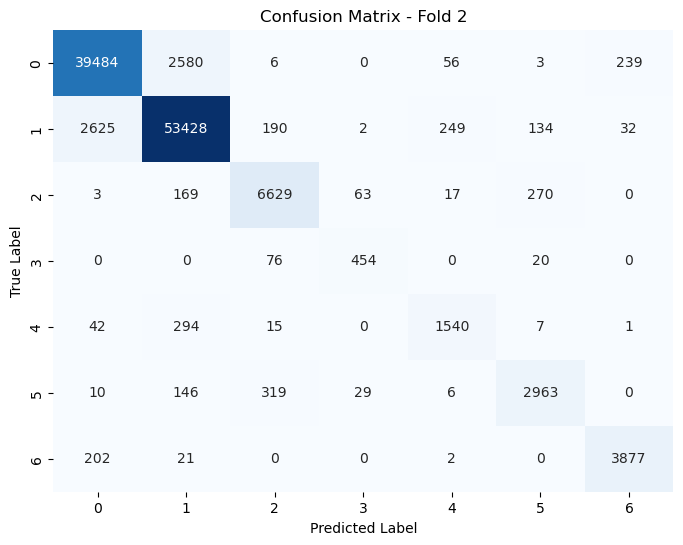

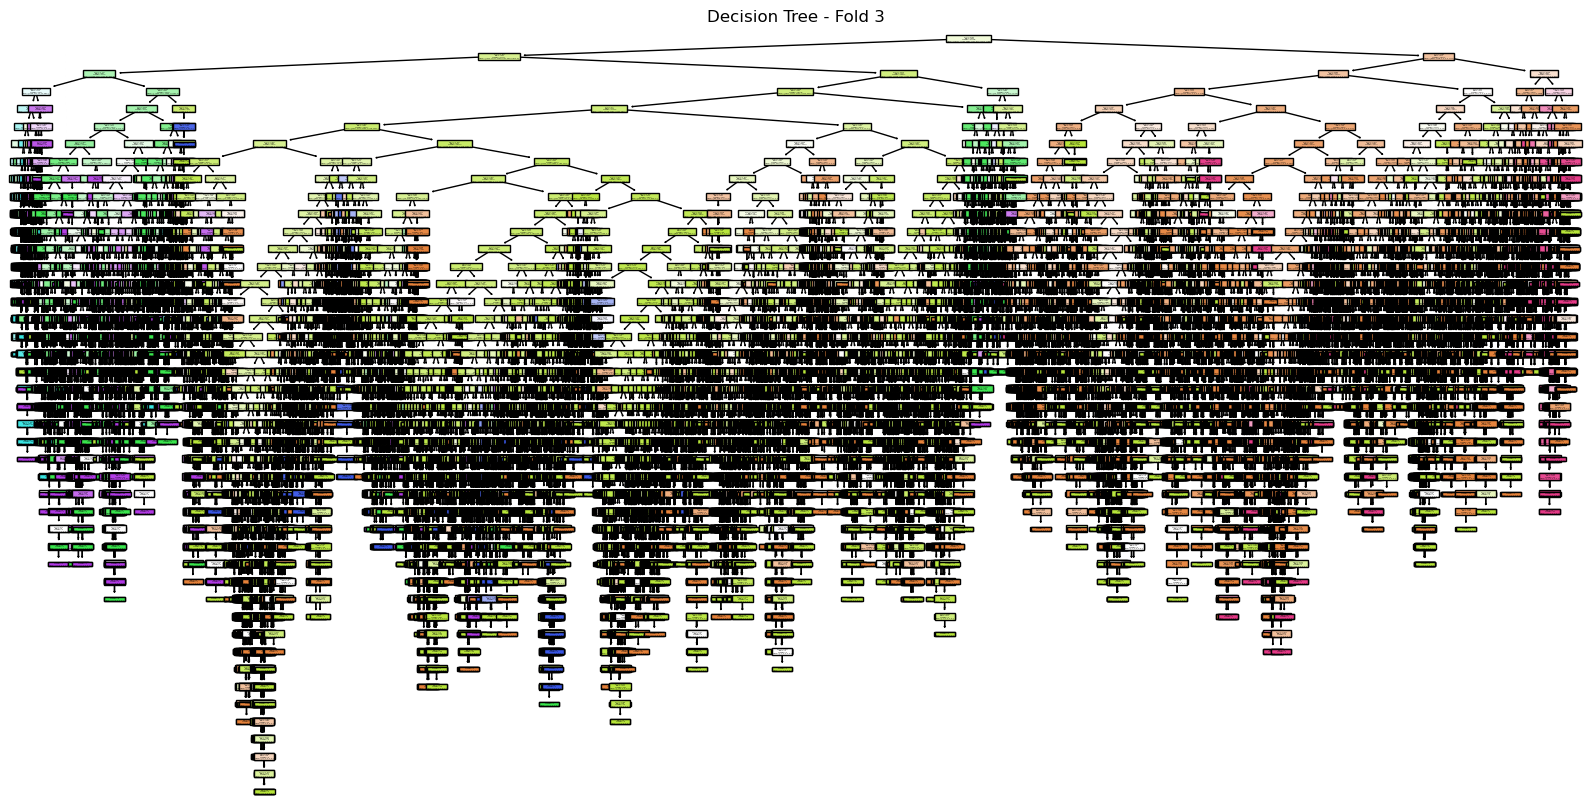

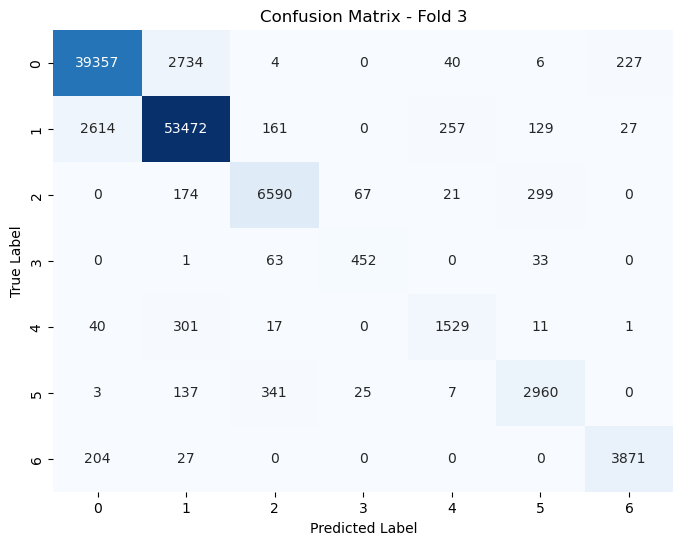

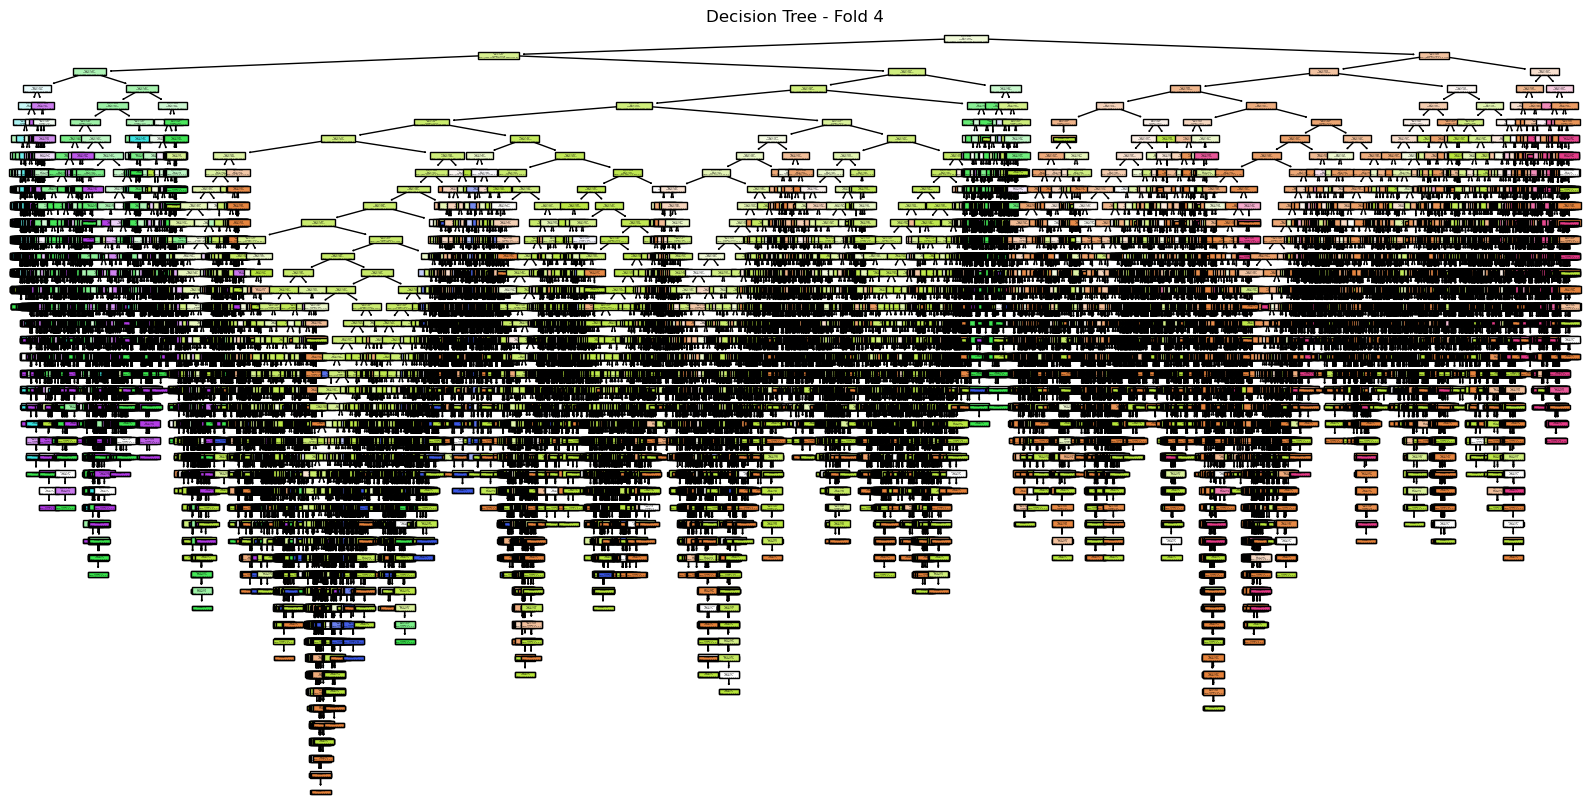

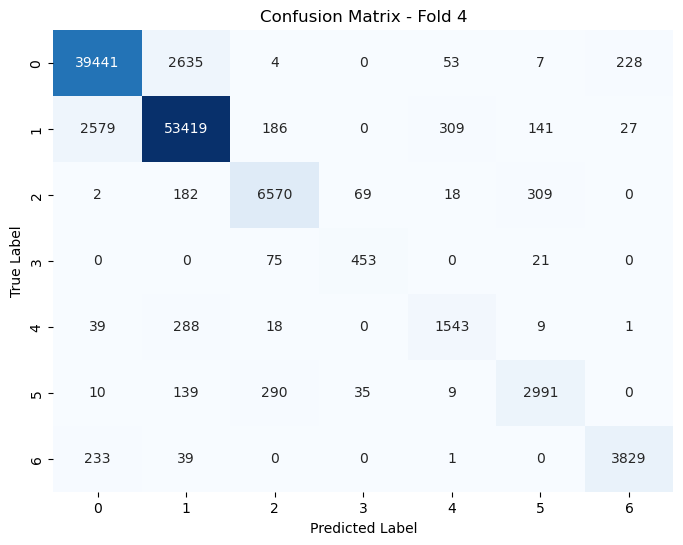

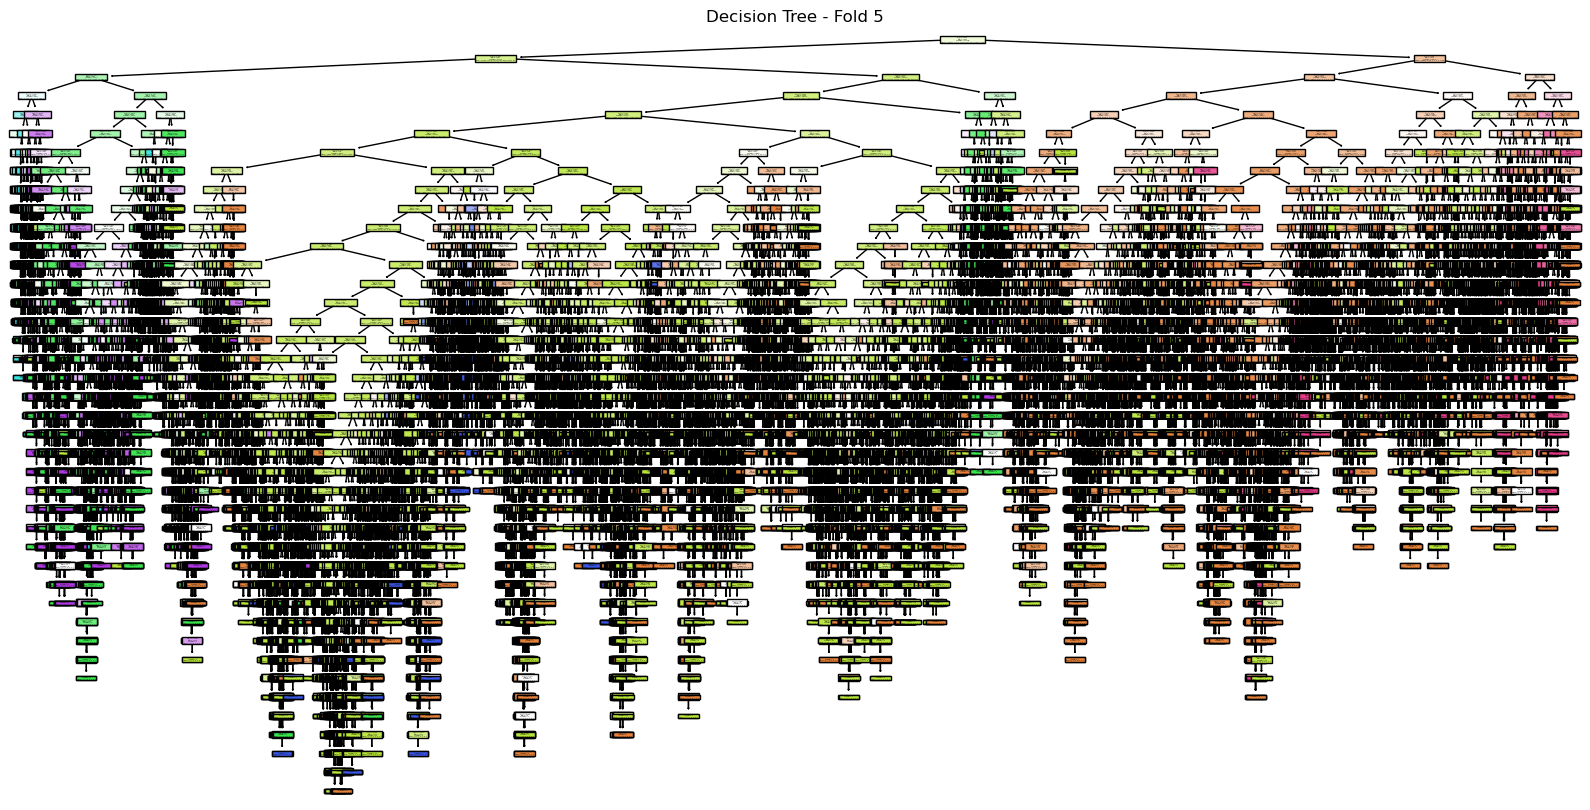

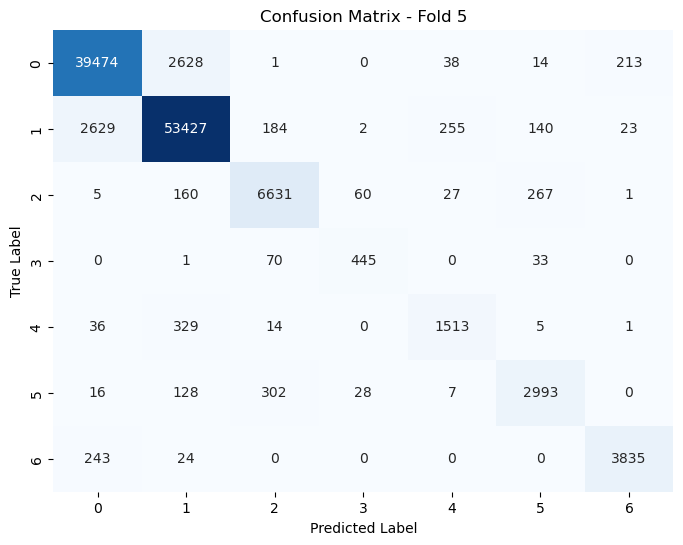

Accuracy: [0.9318434119601043, 0.9326351299019818, 0.931403934527805, 0.9315330200857128, 0.9321526307636702]
Mean Accuracy: 0.9319136254478548


In [2]:
# StratifiedKFoldによるデータの分割とモデルの訓練・評価
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for fold_num, (train, valid) in enumerate(skf.split(X_scaled, y)):
    
    # 訓練データとラベル
    train_data, train_label = X_scaled[train], y.iloc[train].values.flatten()
    
    # テストデータとラベル
    valid_data, valid_label = X_scaled[valid], y.iloc[valid].values.flatten()
    
    # データの分割
    X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.2, random_state=42)

    ###############################################決定木モデルの部分はchatgpt使用############################################################
    
    
    # 決定木モデルの定義と訓練
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train)

    # 決定木のツリー構造を可視化
    plt.figure(figsize=(20, 10))
    plot_tree(dt_classifier, filled=True, feature_names=covertype.feature_names, class_names=covertype.target_names)
    plt.title('Decision Tree - Fold {}'.format(fold_num + 1))
    plt.show()

    
    # テストデータでの予測
    y_pred = dt_classifier.predict(valid_data)
    
    ##############################################決定木モデルの部分はchatgpt使用#############################################################

    # 精度の評価
    accuracy = accuracy_score(valid_label, y_pred)
    accuracies.append(accuracy)

    # 混同行列を計算
    conf_matrix = confusion_matrix(valid_label, y_pred)

    # 混同行列をヒートマップとしてプロット
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix - Fold {}'.format(fold_num + 1))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# 精度の平均を表示
print("Accuracy:", accuracies)
print("Mean Accuracy:", np.mean(accuracies))